# RFC: Human Resources Analytics: Why are our best and most experienced employees leaving prematurely?

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statistics
import statsmodels
from statsmodels.sandbox.stats.runs import mcnemar
from statsmodels.sandbox.stats.runs import stats

In [284]:
hr_stats = pd.read_csv('/Users/cappsjr/Downloads/HR_comma_sep.csv')

# The Dataset

The dataset used for this RFC was published on Kaggle.com by Ludovic Benistant and is titled "Human Resources Analytics: Why are our best and most experienced employees leaving prematurely?".  Information contained in the dataset include employee satisfaction levels, last evaluations, number of projects completed, average monthly hours, number of years spent at the company, involvement in a work accident, status with the company (whether they left the company or continue working there), promotion in the last five years, department of the company, and salary level.  The dataset is simulated and has been released under a CC BY-SA 4.0 License.  

In [4]:
#information about the data
hr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


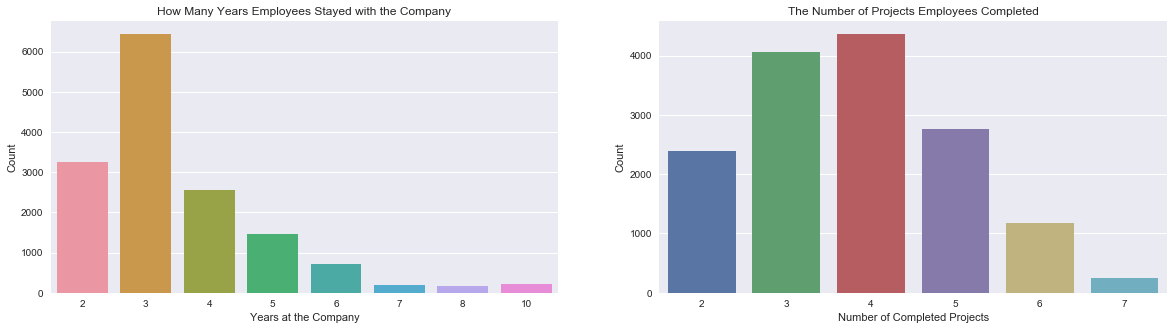

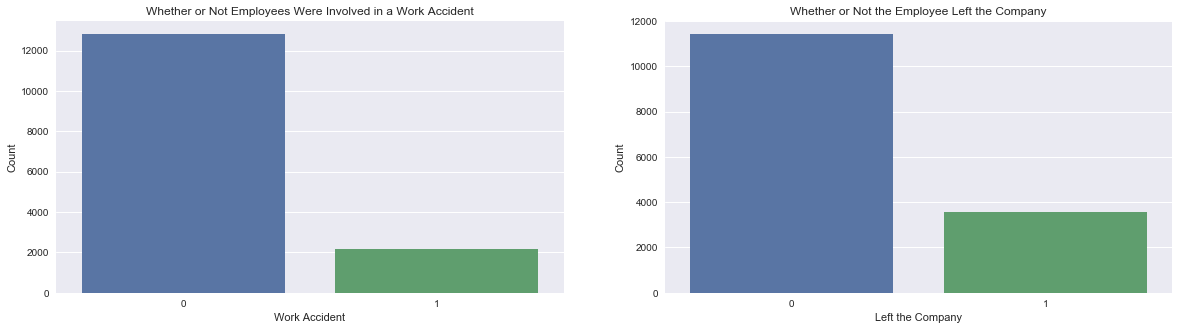

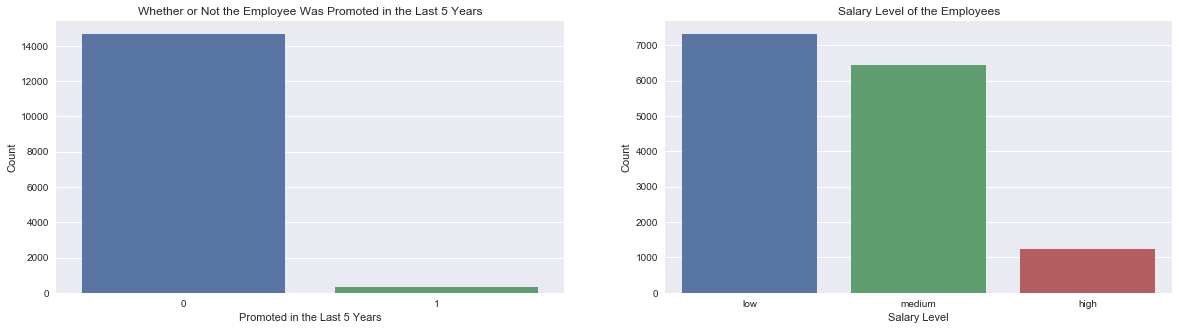

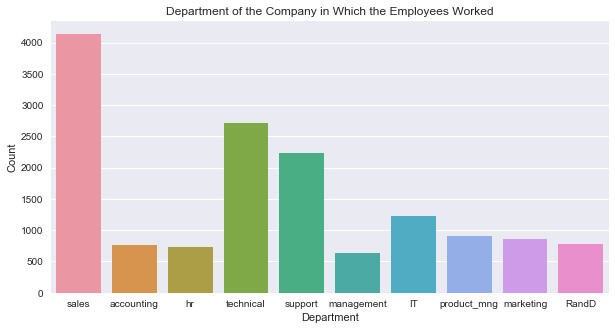

In [8]:
#Employee counts and visualizations for the categorical variables included in the dataset

plt.figure(figsize=(20,5))
#Years spent at the company
plt.subplot(1, 2, 1)
sns.countplot(x='time_spend_company',data = hr_stats)
plt.xlabel('Years at the Company')
plt.ylabel('Count')
plt.title('How Many Years Employees Stayed with the Company')

#Number of projects completed
plt.subplot(1, 2, 2)
sns.countplot(x='number_project',data = hr_stats)
plt.xlabel('Number of Completed Projects')
plt.ylabel('Count')
plt.title('The Number of Projects Employees Completed')
plt.show()

plt.figure(figsize=(20,5))
#Whether or not involved in a work accident 
plt.subplot(1, 2, 1)
sns.countplot(x='Work_accident',data = hr_stats)
plt.xlabel('Work Accident')
plt.ylabel('Count')
plt.title('Whether or Not Employees Were Involved in a Work Accident')

#Whether or not they left the company
plt.subplot(1, 2, 2)
sns.countplot(x='left',data = hr_stats)
plt.xlabel('Left the Company')
plt.ylabel('Count')
plt.title('Whether or Not the Employee Left the Company')
plt.show()

plt.figure(figsize=(20,5))
#Whether or not they were promoted within the last five years
plt.subplot(1, 2, 1)
sns.countplot(x='promotion_last_5years',data = hr_stats)
plt.xlabel('Promoted in the Last 5 Years')
plt.ylabel('Count')
plt.title('Whether or Not the Employee Was Promoted in the Last 5 Years')

#Employee salary level
plt.subplot(1, 2, 2)
sns.countplot(x='salary',data = hr_stats)
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.title('Salary Level of the Employees')
plt.show()

#Department the employee worked in
plt.figure(figsize=(10,5))
sns.countplot(x='sales',data = hr_stats)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department of the Company in Which the Employees Worked')
plt.show()

# The Problem:  Employee Churn

The problem that will be addressed with this experiment is employee churn.  Employee churn is the overall turnover in a company’s staff during a given period of time as old employees leave and new employees are hired.  There will be inevitable employee turnover, but a high churn rate is costly to a company because recruitment, hiring, and training all comes with a price, and it will also take time for a new employee to be as productive as an existing employee.  Furthermore, an unusually high employee churn rate may indicate other problems that exist within the organization, such as unreasonable expectations, uncompetitive compensation, low morale, poor management, or ineffective human resources management.  The data examined shows an employment churn rate of 23.8%, nearly a quarter of the employees represented in the dataset.  The employee churn rate is usually measured by calculating the percentage of employees who leave the company during a given period of time.  However, the information in the dataset does not define any period of time, so in this case there there is an assumption that the dataset represents a given period of time, and the churn rate will be measured by calculating the percentage of employees who have left within that time period.  The data does provide information about how long the people who left the company stayed.  Of the 3,571 people who left the company, 53 people left after two years (1.48%), 1586 left after three years (44.41%), 890 people left after four years (24.92%), 833 left after five years (23.33%), 209 people left after six year (5.85%), and not one in the dataset that stayed longer than six years left the company.

Before attempting to develop a solution to the problem of employee churn, it is helpful to examine and compare the characteristics of the employees who left the company and the employees who stayed with the company.  When one looks at the average employee who left compared to the average employee who did not stay (using the mean) several important data points pop out: satisfaction level, average monthly hours, years spent at the company, work accidents, and promotions in the last five years. Employees who left had a lower satisfaction level (0.44 compared to 0.67), spent more time working per month (207.42 hours compared to 199.06 hours), and had a lower rate of promotion (0.005 compared to 0.026)  than employees who stayed with the company.  Employees who left the company tended to stay with the company for longer than those who stayed (average 3.88 years at the company compared to 3.38 years).  The fewer years spent at the company by those who stayed is explained by the large number of relatively new employees who still work at the company (8,048, or 70.42%, of the 11,428 employees who stayed with the company have worked there for three years or less).  It is interesting to note that employees who stayed were more likely to involved in a work accident compared to those employees who left.  There is little evidence or data to explain why this might be the case.  However, there is more than that to the story because the averages do not address salary level or department in which the employee worked.  60.82% of employees who left had a low salary compared to 45.12% of employees who stayed, 36.88% of employees who left had a medium salary compared to 44.88% of employees who stayed, and 2.30% of employees who left had a high salary compared to 10.11% of employees who stayed.  Finally, the proportion of people who leave from each department of the company does not appear to be significantly different from the proportion of people who stay from each department.  For example, of the 3,571 people who left the company, 1,014 employees, or 28.4%, were from the sales department, and of the 11,428 people who stayed with the company, 3,126 employees, or 27.35%, were from the sales deparment.  This pattern is repeats itself for each of the deparments of the company.  

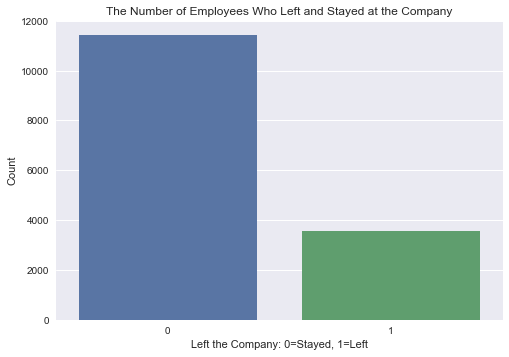

Number of Employees That Left: 3571
Total Number of Employees in the Dataset: 14999
Proportion of Employees Who Left: 23.81 %


In [132]:
#the total number of employees who left and the proportion of employees who left
sns.countplot(x='left', data=hr_stats)
plt.xlabel('Left the Company: 0=Stayed, 1=Left')
plt.ylabel('Count')
plt.title('The Number of Employees Who Left and Stayed at the Company')
plt.show()

num_left = len(hr_stats[hr_stats['left']==1])
num_total = len(hr_stats)
print("Number of Employees That Left:", num_left)
print("Total Number of Employees in the Dataset:", num_total)
print("Proportion of Employees Who Left:", round(num_left/num_total * 100, 2), '%')

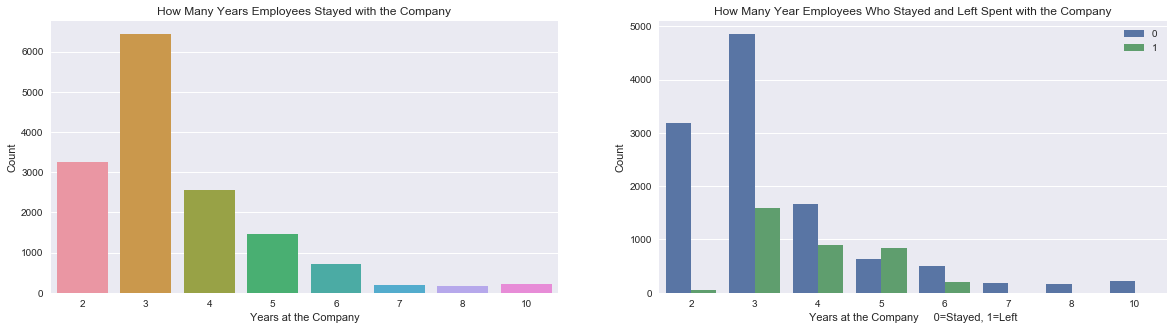

Avg. # of Years Spent at the Company: 3.498233215547703
Employees Who Stayed
# of 2-Year Employees Who Stayed: 3191        Proportion:  27.92 %
# of 3-Year Employees Who Stayed: 4857        Proportion:  42.5 %
# of 4-Year Employees Who Stayed: 1667        Proportion:  14.59 %
# of 5-Year Employees Who Stayed: 640         Proportion:  5.6 %
# of 6-Year Employees Who Stayed: 509         Proportion:  4.45 %
# of 7-Year Employees Who Stayed: 188
# of 8-Year Employees Who Stayed: 162
# of 9-Year Employees Who Stayed: 0
# of 10-Year Employees Who Stayed: 214


Employees Who Left
# of Employees Who Left After 2 Years: 53     Proportion:  1.48 %
# of Employees Who Left After 3 Years: 1586   Proportion:  44.41 %
# of Employees Who Left After 4 Years: 890    Proportion:  24.92 %
# of Employees Who Left After 5 Years: 833    Proportion:  23.33 %
# of Employees Who Left After 6 Years: 209    Proportion:  5.85 %
# of Employees Who Left After 7 Years: 0
# of Employees Who Left After 8 Years: 0
# of 

In [307]:
#Graphic and information showing how long employees are staying at the company
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='time_spend_company', data=hr_stats)
plt.xlabel('Years at the Company')
plt.ylabel('Count')
plt.title('How Many Years Employees Stayed with the Company')
plt.subplot(1, 2, 2)
sns.countplot(x='time_spend_company', data=hr_stats, hue='left')
plt.xlabel('Years at the Company     0=Stayed, 1=Left')
plt.ylabel('Count')
plt.title('How Many Year Employees Who Stayed and Left Spent with the Company')
plt.legend(loc='upper right')
plt.show()

print('Avg. # of Years Spent at the Company:', hr_stats['time_spend_company'].mean())


two_years_stay = len(hr_stats[(hr_stats['time_spend_company']==2) & (hr_stats['left']==0)])
three_years_stay = len(hr_stats[(hr_stats['time_spend_company']==3) & (hr_stats['left']==0)])
four_years_stay = len(hr_stats[(hr_stats['time_spend_company']==4) & (hr_stats['left']==0)])
five_years_stay = len(hr_stats[(hr_stats['time_spend_company']==5) & (hr_stats['left']==0)])
six_years_stay = len(hr_stats[(hr_stats['time_spend_company']==6) & (hr_stats['left']==0)])
seven_years_stay = len(hr_stats[(hr_stats['time_spend_company']==7) & (hr_stats['left']==0)])
eight_years_stay = len(hr_stats[(hr_stats['time_spend_company']==8) & (hr_stats['left']==0)])
nine_years_stay = len(hr_stats[(hr_stats['time_spend_company']==9) & (hr_stats['left']==0)])
ten_years_stay = len(hr_stats[(hr_stats['time_spend_company']==10) & (hr_stats['left']==0)])

print('Employees Who Stayed')
print('# of 2-Year Employees Who Stayed:', two_years_stay, 
      '       Proportion: ', round(two_years_stay/11428 * 100, 2), '%')
print('# of 3-Year Employees Who Stayed:', three_years_stay, 
      '       Proportion: ', round(three_years_stay/11428 * 100, 2), '%')
print('# of 4-Year Employees Who Stayed:', four_years_stay, 
      '       Proportion: ', round(four_years_stay/11428 * 100, 2), '%')
print('# of 5-Year Employees Who Stayed:', five_years_stay, 
      '        Proportion: ', round(five_years_stay/11428 * 100, 2), '%')
print('# of 6-Year Employees Who Stayed:', six_years_stay, 
      '        Proportion: ', round(six_years_stay/11428 * 100, 2), '%')
print('# of 7-Year Employees Who Stayed:', seven_years_stay)
print('# of 8-Year Employees Who Stayed:', eight_years_stay)
print('# of 9-Year Employees Who Stayed:', nine_years_stay)
print('# of 10-Year Employees Who Stayed:', ten_years_stay)

print('\n')

two_years_left = len(hr_stats[(hr_stats['time_spend_company']==2) & (hr_stats['left']==1)])
three_years_left = len(hr_stats[(hr_stats['time_spend_company']==3) & (hr_stats['left']==1)])
four_years_left = len(hr_stats[(hr_stats['time_spend_company']==4) & (hr_stats['left']==1)])
five_years_left = len(hr_stats[(hr_stats['time_spend_company']==5) & (hr_stats['left']==1)])
six_years_left = len(hr_stats[(hr_stats['time_spend_company']==6) & (hr_stats['left']==1)])
seven_years_left = len(hr_stats[(hr_stats['time_spend_company']==7) & (hr_stats['left']==1)])
eight_years_left = len(hr_stats[(hr_stats['time_spend_company']==8) & (hr_stats['left']==1)])
nine_years_left = len(hr_stats[(hr_stats['time_spend_company']==9) & (hr_stats['left']==1)])
ten_years_left = len(hr_stats[(hr_stats['time_spend_company']==10) & (hr_stats['left']==1)])

print('Employees Who Left')
print('# of Employees Who Left After 2 Years:', two_years_left, 
      '    Proportion: ', round(two_years_left/3571 * 100, 2), '%')
print('# of Employees Who Left After 3 Years:', three_years_left, 
      '  Proportion: ', round(three_years_left/3571 * 100, 2), '%')
print('# of Employees Who Left After 4 Years:', four_years_left, 
      '   Proportion: ', round(four_years_left/3571 * 100, 2), '%')
print('# of Employees Who Left After 5 Years:', five_years_left, 
      '   Proportion: ', round(five_years_left/3571 * 100, 2), '%')
print('# of Employees Who Left After 6 Years:', six_years_left, 
      '   Proportion: ', round(six_years_left/3571 * 100, 2), '%')
print('# of Employees Who Left After 7 Years:', seven_years_left)
print('# of Employees Who Left After 8 Years:', eight_years_left)
print('# of Employees Who Left After 9 Years:', nine_years_left)
print('# of Employees Who Left After 10 Years:', ten_years_left)

print('\n')

print('Avg. Years Spent at the Company for Employees Who Left & Stayed (0=Stay, 1=Left): ', '\n', 
      round(hr_stats.groupby('left')['time_spend_company'].mean(), 2))

In [140]:
#Need to examine why employees left and the characteristics of the employees who left and the employees who 
#did not leave.

#Mean satisfaction level for those employees who left the company
sat_level_left = hr_stats[(hr_stats['left']==1) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Left the Company')
print(round(sat_level_left.mean(), 2))

print('\n')

#Mean satisfaction level for those employees who did not leave the company
sat_level_stay = hr_stats[(hr_stats['left']==0) & (hr_stats['satisfaction_level'])]
print('Averages (Mean): Did NOT Leave the Company')
print(round(sat_level_stay.mean(), 2))

Averages (Mean): Left the Company
satisfaction_level         0.44
last_evaluation            0.72
number_project             3.86
average_montly_hours     207.42
time_spend_company         3.88
Work_accident              0.05
left                       1.00
promotion_last_5years      0.01
dtype: float64


Averages (Mean): Did NOT Leave the Company
satisfaction_level         0.67
last_evaluation            0.72
number_project             3.79
average_montly_hours     199.06
time_spend_company         3.38
Work_accident              0.18
left                       0.00
promotion_last_5years      0.03
dtype: float64


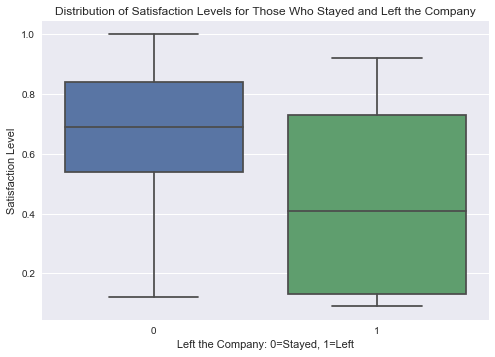

Avg. Satisfaction Level for Employees Who Left & Stayed (0=Stay, 1=Left):  
 left
0    0.67
1    0.44
Name: satisfaction_level, dtype: float64


In [159]:
#Looking at the relationship between satisfation level, salary, and whether or not the employee left
sns.boxplot(x='left', y='satisfaction_level', data=hr_stats)
plt.xlabel('Left the Company: 0=Stayed, 1=Left')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for Those Who Stayed and Left the Company')
plt.show()

#Avg. satisfaction level of those who were promoted and those who were not promoted in the last 5 years
print('Avg. Satisfaction Level for Employees Who Left & Stayed (0=Stay, 1=Left): ', '\n',
      round(hr_stats.groupby('left')['satisfaction_level'].mean(), 2))

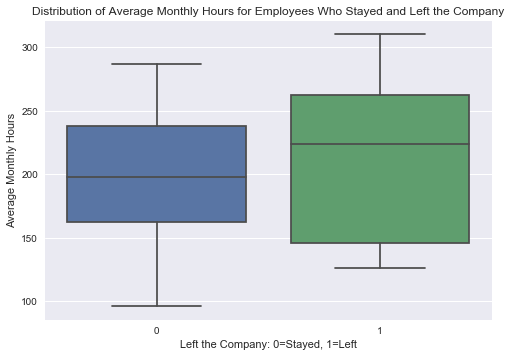

Avg. Monthly for Employees Who Left & Stayed (0=Stay, 1=Left):  
 left
0    199.06
1    207.42
Name: average_montly_hours, dtype: float64


In [160]:
#Showing the relationship between the average monthly hours employees worked and whether or not they left the 
#company
sns.boxplot(x='left', y='average_montly_hours', data=hr_stats)
plt.xlabel('Left the Company: 0=Stayed, 1=Left')
plt.ylabel('Average Monthly Hours')
plt.title('Distribution of Average Monthly Hours for Employees Who Stayed and Left the Company')
plt.show()

print('Avg. Monthly for Employees Who Left & Stayed (0=Stay, 1=Left): ', '\n', 
      round(hr_stats.groupby('left')['average_montly_hours'].mean(), 2))

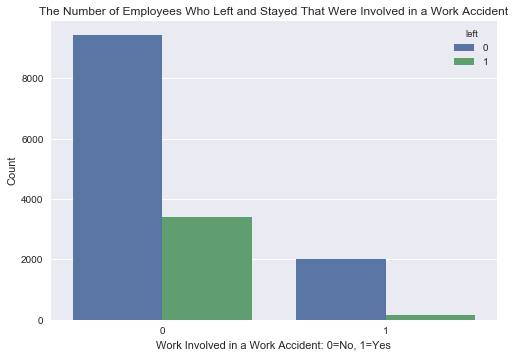

Work Accident Rate for Those Who Left and Stayed (0=Stay, 1=Left):  
 left
0    0.18
1    0.05
Name: Work_accident, dtype: float64


In [161]:
sns.countplot(x='Work_accident', data=hr_stats, hue='left')
plt.xlabel('Work Involved in a Work Accident: 0=No, 1=Yes')
plt.ylabel('Count')
plt.title('The Number of Employees Who Left and Stayed That Were Involved in a Work Accident')
plt.show()

print('Work Accident Rate for Those Who Left and Stayed (0=Stay, 1=Left): ', '\n',
      round(hr_stats.groupby('left')['Work_accident'].mean(), 2))

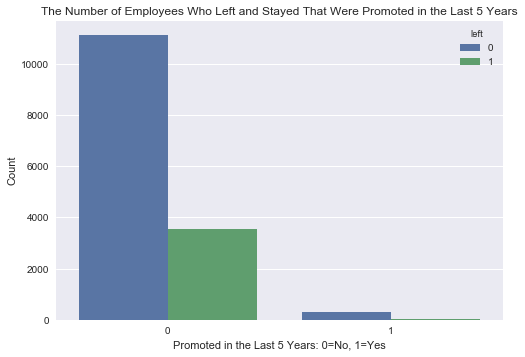

Promotion Rate for Those Who Left and Stayed (0=Stay, 1=Left):  
 left
0    0.03
1    0.01
Name: promotion_last_5years, dtype: float64


In [162]:
#Looking at the relationship between the amount of time spent at the company, whether or not the employee
#received a promotion in the last five years, and whether or not the employee left
sns.countplot(x='promotion_last_5years',data = hr_stats, hue='left')
plt.xlabel('Promoted in the Last 5 Years: 0=No, 1=Yes')
plt.ylabel('Count')
plt.title('The Number of Employees Who Left and Stayed That Were Promoted in the Last 5 Years')
plt.show()

#Avg satisfaction level of those who left and those who stayed
print('Promotion Rate for Those Who Left and Stayed (0=Stay, 1=Left): ', '\n', 
      round(hr_stats.groupby('left')['promotion_last_5years'].mean(), 2))

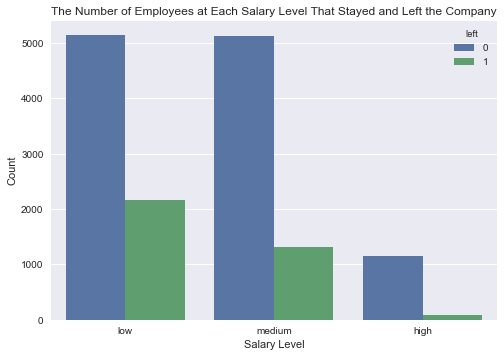

Employees Who Left
# of Employees Who Left with Low Salary: 2172        Proportion: 60.82 %
# of Employees Who Left with Medium Salary: 1317     Proportion: 36.88 %
# of Employees Who Left with High Salary: 82         Proportion: 2.3 %


Employees Who Stayed
# of Employees Who Stayed with Low Salary: 5144      Proportion: 45.01 %
# of Employees Who Stayed with Medium Salary: 5129   Proportion: 44.88 %
# of Employees Who Stayed with High Salary: 1155     Proportion: 10.11 %


In [145]:
#Number and proportion of employees who left at each salary level
sns.countplot(x='salary',data = hr_stats, hue='left')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.title('The Number of Employees at Each Salary Level That Stayed and Left the Company')
plt.show()

print('Employees Who Left')
print('# of Employees Who Left with Low Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='low')]), 
      '       Proportion:', round(2172/3571*100, 2), '%')
print('# of Employees Who Left with Medium Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='medium')]), 
      '    Proportion:', round(1317/3571*100, 2), '%')
print('# of Employees Who Left with High Salary:', len(hr_stats[(hr_stats['left']==1) & (hr_stats['salary']=='high')]), 
      '        Proportion:', round(82/3571*100, 2), '%')

print('\n')

#Number of employees who stayed at each salary level
print('Employees Who Stayed')
print('# of Employees Who Stayed with Low Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='low')]), 
      '     Proportion:', round(5144/11428*100, 2), '%')
print('# of Employees Who Stayed with Medium Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='medium')]), 
      '  Proportion:', round(5129/11428*100, 2), '%')
print('# of Employees Who Stayed with High Salary:', len(hr_stats[(hr_stats['left']==0) & (hr_stats['salary']=='high')]), 
      '    Proportion:', round(1155/11428*100, 2), '%')

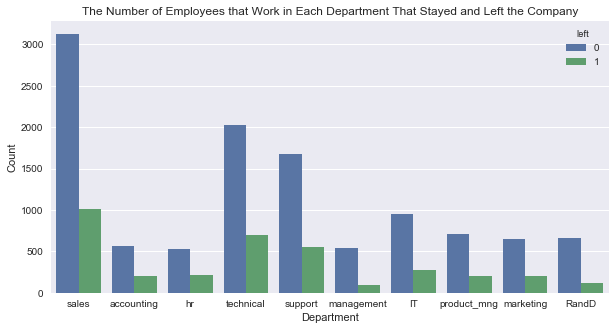

Employees Who Left:
# of Employees Who Left in the Sales Department: 1014                    Proportion: 28.4 %
# of Employees Who Left in the Accounting Department: 204                Proportion: 5.71 %
# of Employees Who Left in the HR Department: 215                        Proportion: 6.02 %
# of Employees Who Left in the Technical Department: 697                 Proportion: 19.52 %
# of Employees Who Left in the Support Department: 555                   Proportion: 15.54 %
# of Employees Who Left in the Management Department: 91                 Proportion: 2.55 %
# of Employees Who Left in the Sales Department: 273                     Proportion: 7.64 %
# of Employees Who Left in the Product Management Department: 198        Proportion: 5.54 %
# of Employees Who Left in the Marketing Department: 203                 Proportion: 5.68 %
# of Employees Who Left in the R&D Department: 121                       Proportion: 3.39 %


Employees Who Stayed:
# of Employees Who Stayed in the S

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(x='sales',data = hr_stats, hue='left')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('The Number of Employees that Work in Each Department That Stayed and Left the Company')
plt.show()

print('Employees Who Left:')
print('# of Employees Who Left in the Sales Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='sales')]), 
      '                   Proportion:', round(1014/3571*100, 2), '%')
print('# of Employees Who Left in the Accounting Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='accounting')]), 
      '               Proportion:', round(204/3571*100, 2), '%')
print('# of Employees Who Left in the HR Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='hr')]), 
      '                       Proportion:', round(215/3571*100, 2), '%')
print('# of Employees Who Left in the Technical Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='technical')]), 
      '                Proportion:', round(697/3571*100, 2), '%')
print('# of Employees Who Left in the Support Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='support')]), 
      '                  Proportion:', round(555/3571*100, 2), '%')
print('# of Employees Who Left in the Management Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='management')]), 
      '                Proportion:', round(91/3571*100, 2), '%')
print('# of Employees Who Left in the Sales Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='IT')]), 
      '                    Proportion:', round(273/3571*100, 2), '%')
print('# of Employees Who Left in the Product Management Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='product_mng')]), 
      '       Proportion:', round(198/3571*100, 2), '%')
print('# of Employees Who Left in the Marketing Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='marketing')]), 
      '                Proportion:', round(203/3571*100, 2), '%')
print('# of Employees Who Left in the R&D Department:', 
      len(hr_stats[(hr_stats['left']==1) & (hr_stats['sales']=='RandD')]), 
      '                      Proportion:', round(121/3571*100, 2), '%')

print('\n')

print('Employees Who Stayed:')
print('# of Employees Who Stayed in the Sales Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='sales')]), 
      '                 Proportion:', round(3126/11428*100, 2), '%')
print('# of Employees Who Stayed in the Accounting Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='accounting')]), 
      '             Proportion:', round(563/11428*100, 2), '%')
print('# of Employees Who Stayed in the HR Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='hr')]), 
      '                     Proportion:', round(524/11428*100, 2), '%')
print('# of Employees Who Stayed in the Technical Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='technical')]), 
      '             Proportion:', round(2023/11428*100, 2), '%')
print('# of Employees Who Stayed in the Support Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='support')]), 
      '               Proportion:', round(1674/11428*100, 2), '%')
print('# of Employees Who Stayed in the Management Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='management')]), 
      '             Proportion:', round(539/11428*100, 2), '%')
print('# of Employees Who Stayed in the Sales Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='IT')]), 
      '                  Proportion:', round(954/11428*100, 2), '%')
print('# of Employees Who Stayed in the Product Management Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='product_mng')]), 
      '     Proportion:', round(704/11428*100, 2),'%')
print('# of Employees Who Stayed in the Marketing Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='marketing')]), 
      '              Proportion:', round(655/11428*100, 2),'%')
print('# of Employees Who Stayed in the R&D Department:', 
      len(hr_stats[(hr_stats['left']==0) & (hr_stats['sales']=='RandD')]), 
      '                    Proportion:', round(666/11428*100, 2),'%')

# The Potential Solution:  Work 200 Hours/Month

In order to decrease employee churn, the company needs to improve on two measures:  1) they need to keep a greater number of employees from leaving the company; and 2) they need to get employees to spend more years working at the company.  When examining the differences between the employees that left the company and the employees that did not leave the company, one observation that is relevant to developing a solution to employee turnover is that the average satisfaction level of those who leave is significantly lower than those who do not leave the company.  This might seem logical, but the key to developing a solution to the problem is understanding why those employees who leave are less satisfied.  Another releveant observation is that the average satisfaction level of employees decreases after two years, three years, and four years before dramatically increasing and leveling out.  The data above suggests several potential reasons to explain these differences in average satisfaction level including salary level and promotion rate, but, for the purposes of this RFC, we will be focusing on the average number of hours the employees work in a month, and the hypothesis is that by implementing and enforcing a policy of working 200 hours per month the rate of employee turnover will decrease.

The average number of hours the employees work in a month appears the be the variable that is causing the most dissatisfaction.  Several observations helped to develop this hypthesis.  First, when one looks at the distribution of 
average hours worked for those that left the company and those that stayed, it shows that the average number of monthly hours worked by those who left was 207.42 compare to 199.06 for those who stayed.  The discrepancy in monthly hours worked by those who stay and those who left becomes even more apparent when it is broken down by number of years with the company.  For employees that stayed, whether they were with the company for two years or ten years, the average number of monthly hours worked never strayed far from 200 hours.  This is why the hypothesis suggests 200 average monthly hours.  However, for employees that left, the average number of monthly hours worked far exceeded 200 hours, with the notable exception of employees that had worked with the company for three years.  Employees that had been with the company for three years and left, the average number of monthly hours dropped significantly to 147.38 hours.  It is also worth noting the pattern that emerges when comparing average monthly hours worked of employees who stayed and left the company to promotions recevied in the last five years and employee salary level.  Those employees that left the company and had not received a promotion in the last five years worked a monthly average of 207.58 hours compared to the 201.25 average monthly hours worked by those who received a promotion and stayed and the 199 hours worked by those who stayed by did not receive a promotion.  On a similar note, the average monthly hours for those who left and had a low, medium, and high salary were 206.63, 209.61, and 193.09, respectively, compared to the average monthly hours worked of 198.62, 199.21, and 200.35 for those who stayed and had a low, medium, and high salary, repectively.  Perhaps this indicates that workers who are working more than 200 hours per month are noticing that some of their colleages who work 200 hours per month or less are receiving promotions and have a greater or similar pay scale and this is leading to their dissatisfaction and ultimately leaving the company.  It is also worth noting that perhaps, among those employees with higher salaries, an average monthly hours worked of less than 200 is indication that are considering leaving the company.

I want to quickly address why we will test the effect of monthly work hours, instead of promotions or salary level, on the employee churn rate.  Testing the effects of more frequent promotions initially looked promising.  However, upon closer inspection of the data, it turns out that promotions may not have the desired effect.  The average satisfaction level for workers who left was significantly lower than those that stayed even for the group of employees that had received a promotion in the last five years.  Employees that left that had received a promotion in the last five years had an average satisfaction level of 0.46, just .03 above the average satisfaction level of employee that left that had not received a promotion in the last five years (0.43).  Compare those averages to the employees who stay (0.667 without a promotion and 0.668 with a promotion), and it looks like something else is causing the dissatisfaction in the group of employees that left.  Furthermore, for those that employees that left, a promotion did not result in more years spent with the company.  In fact, the opposite occurred.  For employees that left who received a promotion, the average number of years spent with the company was 3.26 years compared with 3.88 years for employees that left who did not receive a promotion in the last five years.  

Testing the effects of increasing the salary level of employees also initially looked promising because 60.82% of employees that left had a low salary, and 36.88% had a medium salary.  Compare this with the 45.01% of employees who stayed that had a low salary and the 44.88% with a medium salary, and one might think that by incereasing the number of employees in the medium salary bracket would decrease the number of employees that left.  However, increasing the salary of a group of workers would not only be an expensive option for the company, it might not be the most effective.  The data shows that there is not increase in satisfaction level for employees in the different salary levels that left.  The satisfaction levels for low, medium, and high salary employees was 0.44, 0.44, and 0.43, respectively.  This pattern is the same for employees who stayed with the company.  The satisfaction level for those employees in low, medium, and high levels was 0.67, 0.67, and 0.65, respectively.  Also, similar to the pattern with promotions, as salary goes up the average number of years with the company does not go up.  The average number of years for employees with low salaries who left compared to those who did not leave was 3.87 and 3.25 years, respectively; the average number of years for employees with medium salaries who left compared to those who did not leave was 3.89 and 3.44, respectively; and average number of years for employees with high salaries who left compared to those who did not leave was 3.68 and 3.69, respectively.  

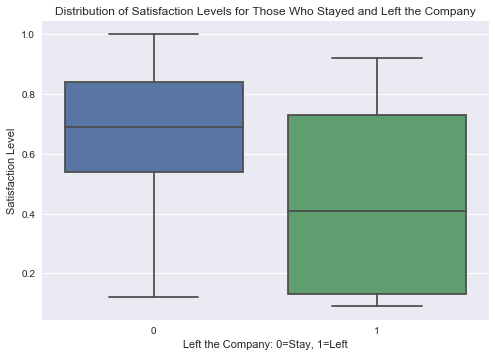

Avg. Satisfaction Level for All Employees:  0.61


Avg. Satisfaction Level for Employees Who Left and Stayed: (0=Stayed, 1=Left)
left
0    0.67
1    0.44
Name: satisfaction_level, dtype: float64


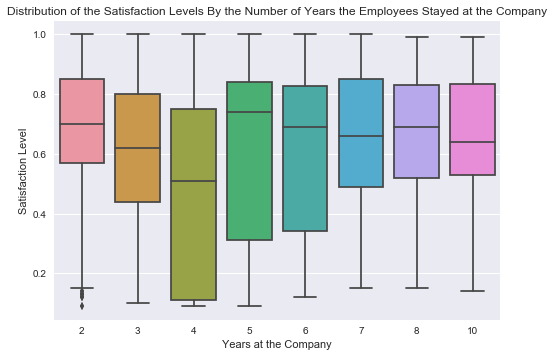

Avg. Satisfaction Level Broken Down By Years at the Company:
time_spend_company
2     0.70
3     0.63
4     0.47
5     0.61
6     0.60
7     0.64
8     0.67
10    0.66
Name: satisfaction_level, dtype: float64


In [242]:
#Examining the relationship between satisfaction level and whether or not the employee left
sns.boxplot(x='left', y='satisfaction_level', data=hr_stats)
plt.xlabel('Left the Company: 0=Stay, 1=Left')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for Those Who Stayed and Left the Company')
plt.show()

print('Avg. Satisfaction Level for All Employees: ',
     round(hr_stats['satisfaction_level'].mean(), 2))

print('\n')

print('Avg. Satisfaction Level for Employees Who Left and Stayed: (0=Stayed, 1=Left)')
print(round(hr_stats.groupby('left')['satisfaction_level'].mean(), 2))

#Examining the relationship between years spent at the company and satisfaction level
sns.boxplot(x='time_spend_company', y='satisfaction_level', data=hr_stats)
plt.xlabel('Years at the Company')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of the Satisfaction Levels By the Number of Years the Employees Stayed at the Company')
plt.show()

print('Avg. Satisfaction Level Broken Down By Years at the Company:')
print(round(hr_stats.groupby('time_spend_company')['satisfaction_level'].mean(), 2))

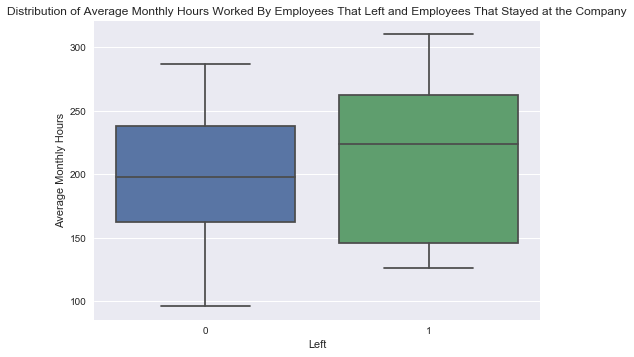

Average Monthly Hours Worked By Employees That Left and Employees That Stayed at the Company: 0=Stayed, 1=Left 
 left
0    199.06
1    207.42
Name: average_montly_hours, dtype: float64


In [149]:
#examining the distribution of average monthly hours worked by employees who stayed and left the company

sns.boxplot(x='left', y='average_montly_hours', data=hr_stats)
plt.xlabel('Left')
plt.ylabel('Average Monthly Hours')
plt.title('Distribution of Average Monthly Hours Worked By Employees That Left and Employees That Stayed at the Company')
plt.show()

print('Average Monthly Hours Worked By Employees That Left and Employees That Stayed at the Company: 0=Stayed, 1=Left', 
      '\n', 
      round(hr_stats.groupby('left')['average_montly_hours'].mean(), 2))

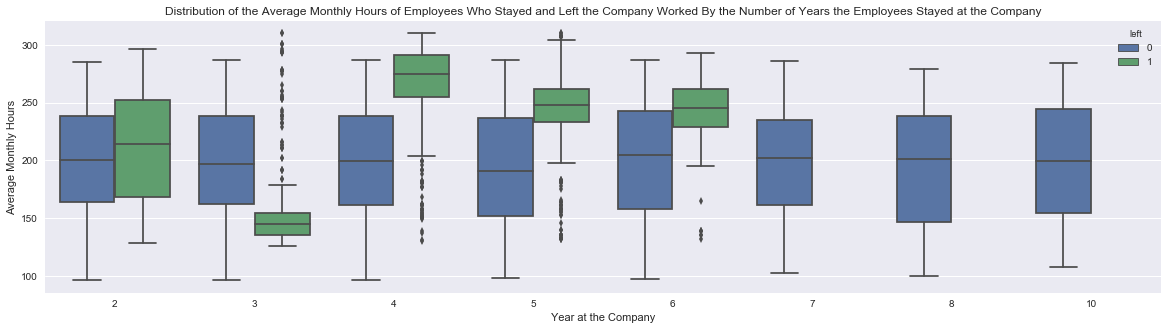

Avg. Monthly Hours for of Employees Who Left and Stayed, Broken Down By Number of Years at the Company: 
 0=Stay, 1=Left 
 left  time_spend_company
0     2                     199.96
      3                     199.45
      4                     198.81
      5                     192.58
      6                     199.65
      7                     200.74
      8                     193.80
      10                    199.22
1     2                     210.77
      3                     147.38
      4                     269.61
      5                     246.34
      6                     242.24
Name: average_montly_hours, dtype: float64


In [150]:
#Examining the relationship between average monthly hours and the number or years spent at the companyand breaking
#it down further into two groups: those who left and those who stayed with the company
plt.figure(figsize=(20, 5))
sns.boxplot(x='time_spend_company', y='average_montly_hours', data=hr_stats, hue='left')
plt.xlabel('Year at the Company')
plt.ylabel('Average Monthly Hours')
plt.title('Distribution of the Average Monthly Hours of Employees Who Stayed and Left the Company Worked By the Number of Years the Employees Stayed at the Company')
plt.show()

print('Avg. Monthly Hours for of Employees Who Left and Stayed, Broken Down By Number of Years at the Company:', '\n',
      '0=Stay, 1=Left', '\n', 
      round(hr_stats.groupby(['left','time_spend_company'])['average_montly_hours'].mean(), 2))

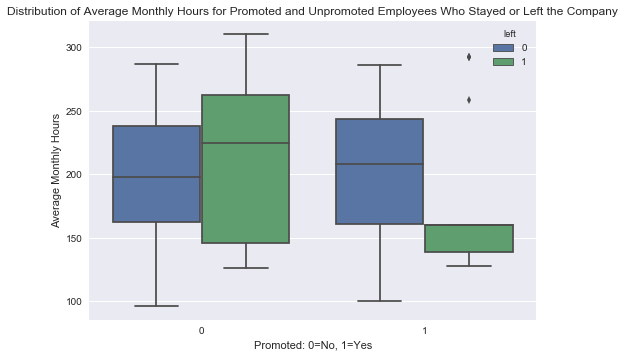

left  promotion_last_5years
0     0                        199.00
      1                        201.25
1     0                        207.58
      1                        177.74
Name: average_montly_hours, dtype: float64


In [151]:
sns.boxplot(x='promotion_last_5years', y='average_montly_hours', data=hr_stats, hue='left')
plt.xlabel('Promoted: 0=No, 1=Yes')
plt.ylabel('Average Monthly Hours')
plt.title('Distribution of Average Monthly Hours for Promoted and Unpromoted Employees Who Stayed or Left the Company')
plt.show()

print(round(hr_stats.groupby(['left','promotion_last_5years'])['average_montly_hours'].mean(), 2))

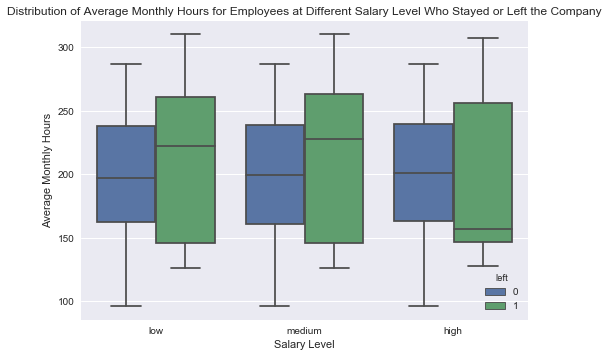

left  salary
0     high      200.35
      low       198.62
      medium    199.21
1     high      193.10
      low       206.63
      medium    209.61
Name: average_montly_hours, dtype: float64


In [152]:
sns.boxplot(x='salary', y='average_montly_hours', data=hr_stats, hue='left')
plt.xlabel('Salary Level')
plt.ylabel('Average Monthly Hours')
plt.title('Distribution of Average Monthly Hours for Employees at Different Salary Level Who Stayed or Left the Company')
plt.show()

print(round(hr_stats.groupby(['left','salary'])['average_montly_hours'].mean(), 2))

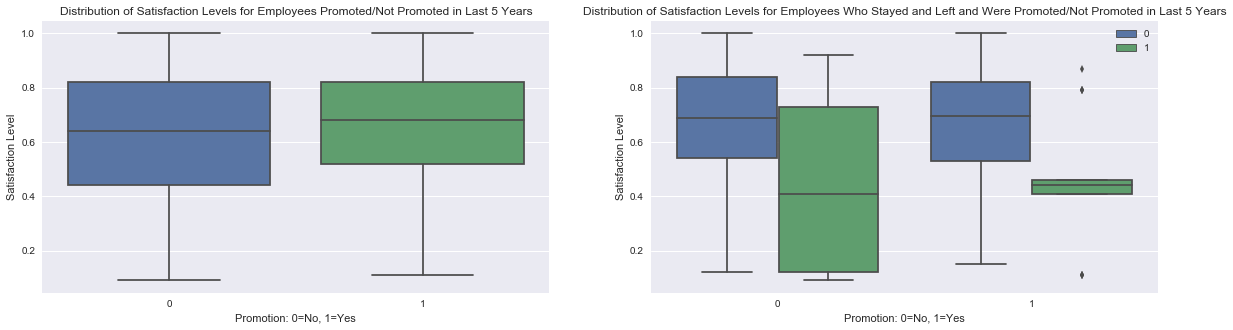

Average (Mean) Satisfaction Level for Employees Promoted/Not Promoted in the Last 5 Years: 
 promotion_last_5years
0    0.61
1    0.66
Name: satisfaction_level, dtype: float64


Average (Mean) Satisfaction Level for Employees Promoted/Not Promoted Who Stayed or Left the Company: 
 left  promotion_last_5years
0     0                        0.67
      1                        0.67
1     0                        0.44
      1                        0.46
Name: satisfaction_level, dtype: float64


In [153]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=hr_stats)
plt.xlabel('Promotion: 0=No, 1=Yes')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for Employees Promoted/Not Promoted in Last 5 Years')
print('\n')
plt.subplot(1,2,2)
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=hr_stats, hue='left')
plt.xlabel('Promotion: 0=No, 1=Yes')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for Employees Who Stayed and Left and Were Promoted/Not Promoted in Last 5 Years')
plt.legend(loc='upper right')
plt.show()

print('Average (Mean) Satisfaction Level for Employees Promoted/Not Promoted in the Last 5 Years:', '\n',  
      round(hr_stats.groupby('promotion_last_5years')['satisfaction_level'].mean(), 2))

print('\n')

print('Average (Mean) Satisfaction Level for Employees Promoted/Not Promoted Who Stayed or Left the Company:', '\n',
      round(hr_stats.groupby(['left','promotion_last_5years'])['satisfaction_level'].mean(), 2))

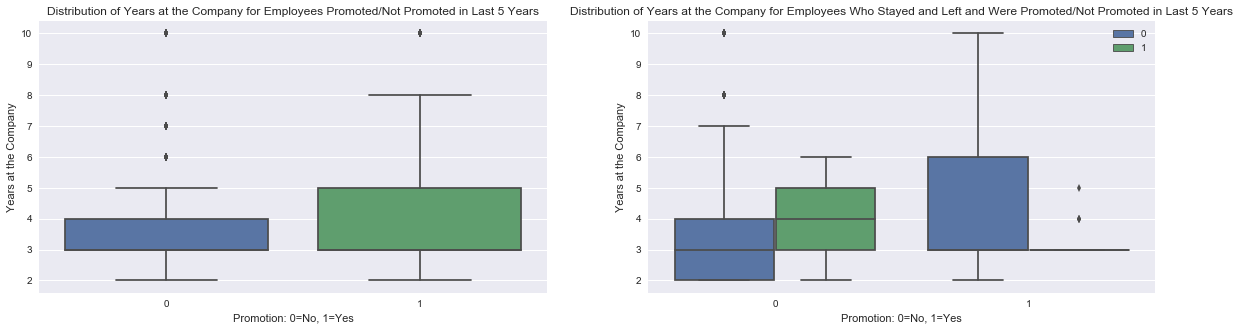

Average (Mean) Number of Years at the Company for Employees Promoted/Not Promoted in the Last 5 Years: 
 promotion_last_5years
0    3.48
1    4.17
Name: time_spend_company, dtype: float64


Average (Mean) Number of Year at the Company for Employees Promoted/Not Promoted Who Stayed or Left the Company: 
 left  promotion_last_5years
0     0                        3.36
      1                        4.22
1     0                        3.88
      1                        3.26
Name: time_spend_company, dtype: float64


In [154]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='promotion_last_5years', y='time_spend_company', data=hr_stats)
plt.xlabel('Promotion: 0=No, 1=Yes')
plt.ylabel('Years at the Company')
plt.title('Distribution of Years at the Company for Employees Promoted/Not Promoted in Last 5 Years')
print('\n')
plt.subplot(1,2,2)
sns.boxplot(x='promotion_last_5years', y='time_spend_company', data=hr_stats, hue='left')
plt.xlabel('Promotion: 0=No, 1=Yes')
plt.ylabel('Years at the Company')
plt.title('Distribution of Years at the Company for Employees Who Stayed and Left and Were Promoted/Not Promoted in Last 5 Years')
plt.legend(loc='upper right')
plt.show()

print('Average (Mean) Number of Years at the Company for Employees Promoted/Not Promoted in the Last 5 Years:', '\n',  
      round(hr_stats.groupby('promotion_last_5years')['time_spend_company'].mean(), 2))

print('\n')

print('Average (Mean) Number of Year at the Company for Employees Promoted/Not Promoted Who Stayed or Left the Company:', '\n',
      round(hr_stats.groupby(['left','promotion_last_5years'])['time_spend_company'].mean(), 2))

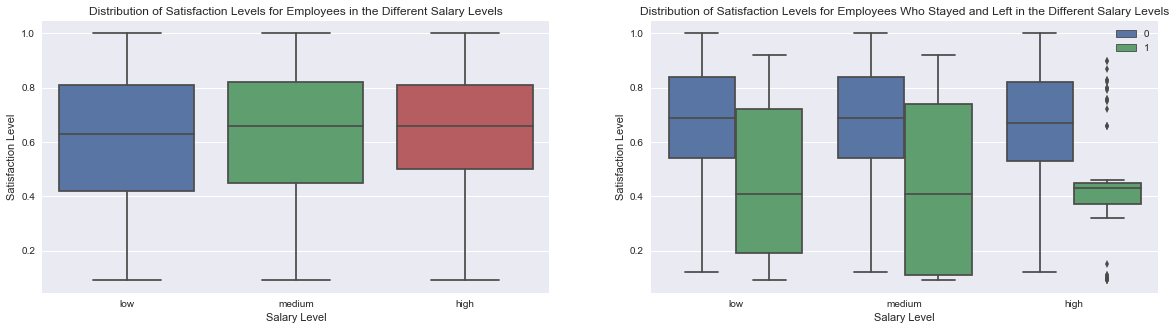

Average (Mean) Satisfaction Level for Employees in the Different Salary Levels: 
 salary
high      0.64
low       0.60
medium    0.62
Name: satisfaction_level, dtype: float64


Average (Mean) Satisfaction Level for Employees Who Stayed and Left in the Different Salary Levels: 
 left  salary
0     high      0.65
      low       0.67
      medium    0.67
1     high      0.43
      low       0.44
      medium    0.44
Name: satisfaction_level, dtype: float64


In [155]:
#Looking at the relationship between salary level and satisfaction level; then breaking that relationship down
#by whether or not the employee stayed or left the company

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='salary', y='satisfaction_level', data=hr_stats)
plt.xlabel('Salary Level')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for Employees in the Different Salary Levels')

plt.subplot(1,2,2)
sns.boxplot(x='salary', y='satisfaction_level', data=hr_stats, hue='left')
plt.xlabel('Salary Level')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for Employees Who Stayed and Left in the Different Salary Levels')
plt.legend(loc='upper right')
plt.show()

print('Average (Mean) Satisfaction Level for Employees in the Different Salary Levels:', '\n',  
      round(hr_stats.groupby('salary')['satisfaction_level'].mean(), 2))

print('\n')

print('Average (Mean) Satisfaction Level for Employees Who Stayed and Left in the Different Salary Levels:', '\n',
      round(hr_stats.groupby(['left','salary'])['satisfaction_level'].mean(), 2))

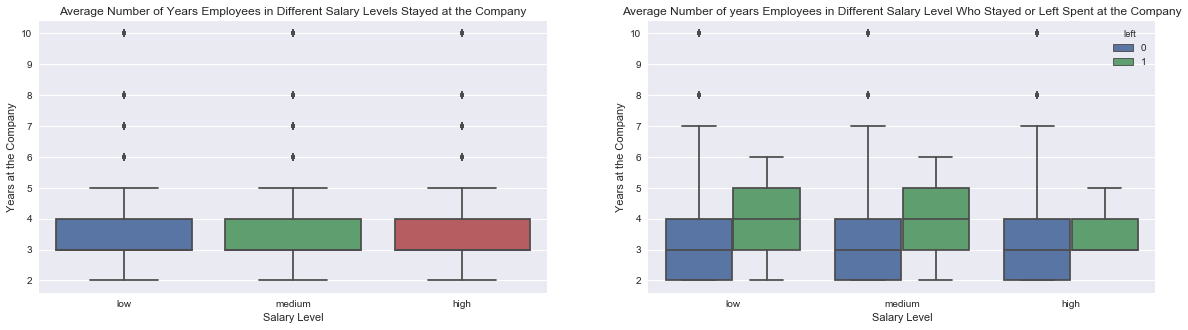

Average (Mean) Number of Years Employees in the Different Salary Levels Stayed at the Company: 
 salary
high      3.69
low       3.44
medium    3.53
Name: time_spend_company, dtype: float64


Average (Mean) Number of Years Employees in the Different Salary Levels Who Stayed or Left Spent at the Company: 
 left  salary
0     high      3.69
      low       3.25
      medium    3.44
1     high      3.68
      low       3.87
      medium    3.89
Name: time_spend_company, dtype: float64


In [308]:
#Looking at the relationship between salary level and the number of years the employees spent at the company; then
#breaking that relationship down by whether the employees stayed or left the company

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='salary', y='time_spend_company', data=hr_stats)
plt.xlabel('Salary Level')
plt.ylabel('Years at the Company')
plt.title('Average Number of Years Employees in Different Salary Levels Stayed at the Company')

plt.subplot(1, 2, 2)
sns.boxplot(x='salary', y='time_spend_company', data=hr_stats, hue='left')
plt.xlabel('Salary Level')
plt.ylabel('Years at the Company')
plt.title('Average Number of years Employees in Different Salary Level Who Stayed or Left Spent at the Company')
plt.show()

print('Average (Mean) Number of Years Employees in the Different Salary Levels Stayed at the Company:', '\n',  
      round(hr_stats.groupby('salary')['time_spend_company'].mean(), 2))

print('\n')

print('Average (Mean) Number of Years Employees in the Different Salary Levels Who Stayed or Left Spent at the Company:', '\n',
      round(hr_stats.groupby(['left','salary'])['time_spend_company'].mean(), 2))

# The Method of Testing the Solution:

Experiment:

The first task in conducting this experiment is to count the number of employees in the dataset that worked an average of 200 monthly hours and put them in the test group.  This may seem backwards because normally a sample is collected first then the sample is divided into two groups, the test group and the control group.  However, in this case, in order to make the test group and the control group the same size, we need to know exactly how big the test group will be.  Once the test group has been assembled and counted, a random selection of equal size as the test group will be selected from the entire employee population and placed in the control group.  Once the test group and control have been assembled, we will compare the employee churn rate for each group to see if there are any differences.  We will then conduct a McNemar test to determine whether the results of the test are statistically significant.  Furthermore, afte the test has been conducted, it will be necessary to look at the average monthly hours, satisfaction levels, promotion rates, salary level, number of years with the company, and the company department of the employees in each group to make sure that there is no lurking variable that may be weighing on the results.    

Key Metrics:

The key metric to determine whether or not the hypothesis is correct is employee churn rate for the control group and the test group.  If the hypothesis is correct the employee churn rate for the test group should decrease while the employee churn rate for the control group should remain the same.  This would occur because the number of employees who leave the test group will have decreased compared to the control group.  In order for this test to be considered significant, we will require a p-value of 0.05 or less.   

Other Metrics:

There will be other noteworthy measurements that can be taken from this experiment as well.  It will be interesting to examine the average satisfaction level, average number of projects completed, promotion rates, and salary level of the control group and the test group both before and after the experiment is conducted.  If the hypothesis is correct, one could surmise that the satisfaction level will increase for the test group compared to the control group.  


# Test Results

The experiment appears to support and confirm the hypothesis that implementing and enforcing an average employee monthly work average of 200 hours will decrease employee churn.  The employee churn rate for the control group was 15.52% while the employee churn rate for the test group was 0.0%, and a McNemar test confirmed the statistical significance of the results with a p-value of 0.00766.

Other measurements appear to confirm the hypothesis as well.  The control group worked an average of 203.93 monthly hours and had an average satisfaction level of 0.65 whereas the test group worked an average of 200 monthly hours and had an average satisfaction level of 0.67.  The test group also had a higher promotion rate, 0.2 compared to 0.0 for the control group.  The control group averaged more years spent at the company and more projects completed than the test group.  Teh greater number of projects completed by the control may be explained by the higher average number of years spent the company, but both of those variables should be examined more closely to make sure there is not some bias or lurking variable at work.  The hypothesis becomes even more compelling when you compare the test group to those people in the control group that left the company and to those people in the control group that stayed at the company.  Subjects in the control group that left the company worked an average of 234.78 monthly hours and had an average satisfaction level of 0.4, compared to subjects in the control group that stayed at the company, who worked and average of 198.27 monthly hours and had an average satisfaction level of 0.7.   

In [245]:
test_group = hr_stats[hr_stats['average_montly_hours']==200]

In [228]:
len(test_group)

58

In [213]:
np.random.randint(1,14999, 58)

array([ 5804,  7277,  9953,  9909,   463,   267,  6350,  4475,  4387,
       10785,  5663, 14021,  4119,   859, 13554, 14974, 10623, 14536,
        7623,  7918, 11773, 12902,  8203,  5602,  3360,  5513,  2585,
       11284, 13361, 10200,  7975, 10523,  2889,  5282, 14747,   147,
         900,  4316, 12967,  2679, 13100, 12780,  6302, 10783, 13551,
        3525,  6710,  3225, 11313,  8762,  8178,  3210, 10716,  6289,
        6591,  7545,  4370,  5129])

In [224]:
control_group = hr_stats.loc[ [ 5804,  7277,  9953,  9909,   463,   267,  6350,  4475,  4387,
       10785,  5663, 14021,  4119,   859, 13554, 14974, 10623, 14536,
        7623,  7918, 11773, 12902,  8203,  5602,  3360,  5513,  2585,
       11284, 13361, 10200,  7975, 10523,  2889,  5282, 14747,   147,
         900,  4316, 12967,  2679, 13100, 12780,  6302, 10783, 13551,
        3525,  6710,  3225, 11313,  8762,  8178,  3210, 10716,  6289,
        6591,  7545,  4370,  5129] , :]

In [240]:
#churn rate for the test group and the control group

test_num_left = len(test_group[test_group['left']==1])
test_num_total = len(test_group)

print('Test Group')
print('Number of Employees That Left: ', test_num_left)
print('Number of Employees in the Group: ', test_num_total)
print('Employee Churn Rate for the Test Group: ',
     round(test_num_left/test_num_total*100, 2), '%')

print('\n')

control_num_left = len(control_group[control_group['left']==1])
control_num_total = len(control_group)

print('Control Group')
print('Number of Employees That Left: ', control_num_left)
print('Number of Employees in the Group: ', control_num_total)
print('Employee Churn Rate for the Control Group: ',
     round(control_num_left/control_num_total*100, 2), '%')

Test Group
Number of Employees That Left:  0
Number of Employees in the Group:  58
Employee Churn Rate for the Test Group:  0.0 %


Control Group
Number of Employees That Left:  9
Number of Employees in the Group:  58
Employee Churn Rate for the Control Group:  15.52 %


In [244]:
#McNemar test
statsmodels.sandbox.stats.runs.mcnemar(x= control_group['left'], y=test_group['left'], exact=False, correction=True)

(7.1111111111111107, 0.0076607611351794608)

In [282]:
#Other metrics for both the test group and the control group
print('Test Group: ')
print('Avg. (Mean) Number of Monthly Hours Worked: ', round(test_group['average_montly_hours'].mean(), 2))
print('Avg. (Mean) Number of Years with the Company: ', round(test_group['time_spend_company'].mean(), 2))
print('Avg. (Mean) Satisfaction Level', round(test_group['satisfaction_level'].mean(), 2))
print('Avg. (Mean) Number of Projects Completed: ', round(test_group['number_project'].mean(), 2))
print('Promotion Rate: ', round(test_group['promotion_last_5years'].mean(), 2))

print('\n')

print('Control Group: ')
print('Avg. (Mean) Number of Monthly Hours Worked: ', round(control_group['average_montly_hours'].mean(), 2))
print('Avg. (Mean) Number of Years with the Company: ', round(control_group['time_spend_company'].mean(), 2))
print('Avg. (Mean) Satisfaction Level: ', round(control_group['satisfaction_level'].mean(), 2))
print('Avg. (Mean) Number of Projects Completed: ', round(control_group['number_project'].mean(), 2))
print('Promotion Rate: ', round(control_group['promotion_last_5years'].mean(), 2))

Test Group: 
Avg. (Mean) Number of Monthly Hours Worked:  200.0
Avg. (Mean) Number of Years with the Company:  3.14
Avg. (Mean) Satisfaction Level 0.67
Avg. (Mean) Number of Projects Completed:  3.88
Promotion Rate:  0.02


Control Group: 
Avg. (Mean) Number of Monthly Hours Worked:  203.93
Avg. (Mean) Number of Years with the Company:  3.29
Avg. (Mean) Satisfaction Level:  0.65
Avg. (Mean) Number of Projects Completed:  3.98
Promotion Rate:  0.0


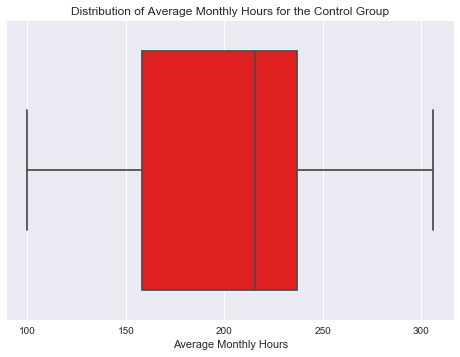

In [310]:
#boxplot of distribution of average monthly hours for the control group
#similar boxplot for test group unnecessary since all test group subjects worked 200 monthly hours
sns.boxplot(x='average_montly_hours', data=control_group, color='r')
plt.xlabel('Average Monthly Hours')
plt.title('Distribution of Average Monthly Hours for the Control Group')
plt.show()

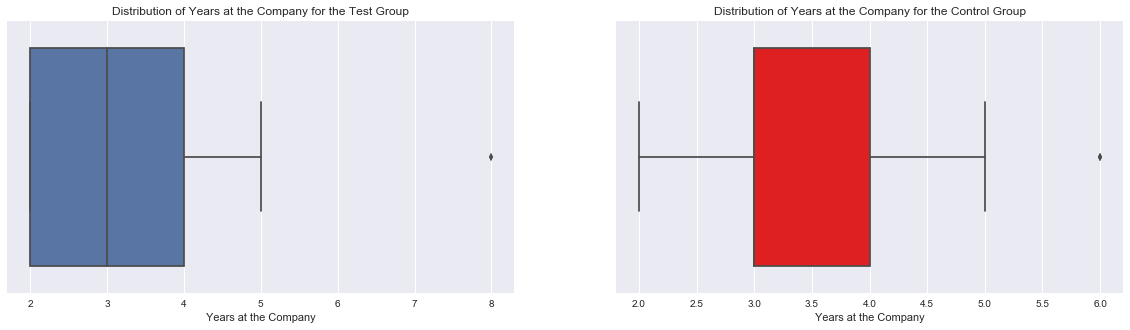

In [309]:
#boxplot showing the distribution of years spent with the company for the test group and the control group
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='time_spend_company', data=test_group)
plt.xlabel('Years at the Company')
plt.title('Distribution of Years at the Company for the Test Group')

plt.subplot(1, 2, 2)
sns.boxplot(x='time_spend_company', data=control_group, color = 'r')
plt.xlabel('Years at the Company')
plt.title('Distribution of Years at the Company for the Control Group')
plt.show()

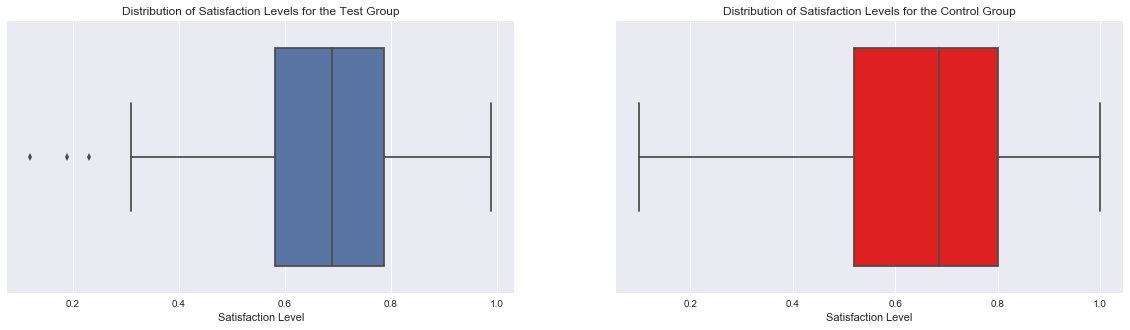

In [311]:
#boxplot of the distribution of satisfaction levels for the test group and the control group
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='satisfaction_level', data=test_group)
plt.xlabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for the Test Group')

plt.subplot(1, 2, 2)
sns.boxplot(x='satisfaction_level', data=control_group, color='r')
plt.xlabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for the Control Group')
plt.show()

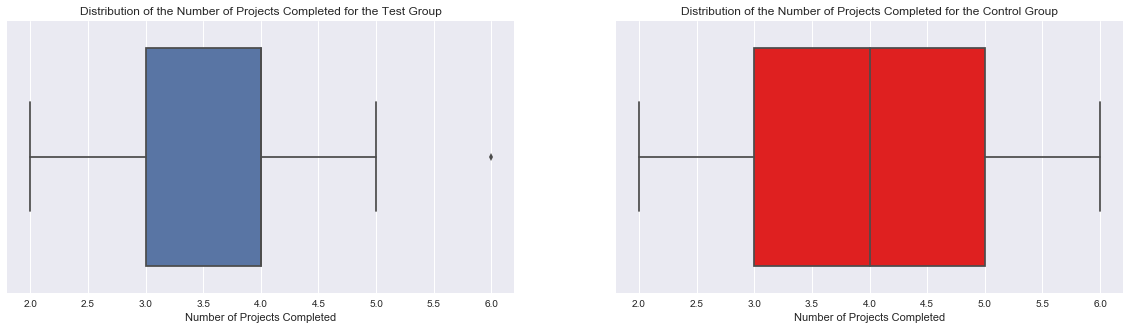

In [312]:
#distribution of the number of projects completed for the test group and the control group
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='number_project', data=test_group)
plt.xlabel('Number of Projects Completed')
plt.title('Distribution of the Number of Projects Completed for the Test Group')

plt.subplot(1, 2, 2)
sns.boxplot(x='number_project', data=control_group, color='r')
plt.xlabel('Number of Projects Completed')
plt.title('Distribution of the Number of Projects Completed for the Control Group')
plt.show()

In [283]:
#the control group broken down by those who stayed and left the company; appears to further support the hypothesis
print('Control Group Stats: Left v. Stay', '\n')
print('Avg. (Mean) Monthly Hours: ', '\n', 
      round(control_group.groupby('left')['average_montly_hours'].mean(), 2), '\n')
print('Avg. (Mean) Number of Years with the Company: ', '\n', 
      round(control_group.groupby('left')['time_spend_company'].mean(), 2), '\n')
print('Avg. (Mean) Satisfaction Level: ', '\n', 
      round(control_group.groupby('left')['satisfaction_level'].mean(), 2), '\n')
print('Avg. (Mean) Number of Projects Completed: ', '\n', 
      round(control_group.groupby('left')['number_project'].mean(), 2), '\n')
print('Promotion Rate: ', '\n', 
      round(control_group.groupby('left')['promotion_last_5years'].mean(), 2), '\n')

Control Group Stats: Left v. Stay 

Avg. (Mean) Monthly Hours:  
 left
0    198.27
1    234.78
Name: average_montly_hours, dtype: float64 

Avg. (Mean) Number of Years with the Company:  
 left
0    3.16
1    4.00
Name: time_spend_company, dtype: float64 

Avg. (Mean) Satisfaction Level:  
 left
0    0.7
1    0.4
Name: satisfaction_level, dtype: float64 

Avg. (Mean) Number of Projects Completed:  
 left
0    3.98
1    4.00
Name: number_project, dtype: float64 

Promotion Rate:  
 left
0    0
1    0
Name: promotion_last_5years, dtype: int64 



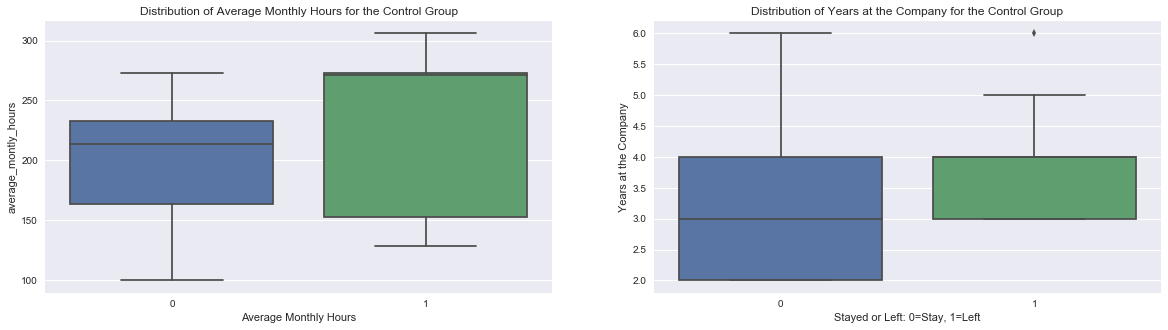

In [303]:
#Distribution of average monthly hours of the control group broken down by those the left and those that stayed
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='average_montly_hours', data=control_group)
plt.xlabel('Average Monthly Hours')
plt.title('Distribution of Average Monthly Hours for the Control Group')

#Distribution of years spent at the company of the control group broken down by those the left and those that stayed
plt.subplot(1, 2, 2)
sns.boxplot(x='left', y='time_spend_company', data=control_group)
plt.xlabel('Stayed or Left: 0=Stay, 1=Left')
plt.ylabel('Years at the Company')
plt.title('Distribution of Years at the Company for the Control Group')
plt.show()

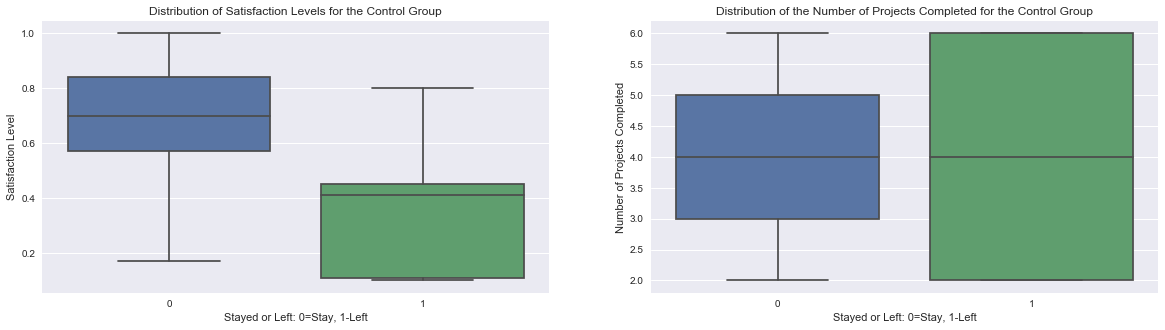

In [305]:
#Distribution of satisfaction levels of the control group broken down by those the left and those that stayed
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=control_group)
plt.xlabel('Stayed or Left: 0=Stay, 1-Left')
plt.ylabel('Satisfaction Level')
plt.title('Distribution of Satisfaction Levels for the Control Group')

#Distribution of number of projects completed of the control group broken down by those the left and those that stayed
plt.subplot(1, 2, 2)
sns.boxplot(x='left', y='number_project', data=control_group)
plt.xlabel('Stayed or Left: 0=Stay, 1-Left')
plt.ylabel('Number of Projects Completed')
plt.title('Distribution of the Number of Projects Completed for the Control Group')
plt.show()